In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/walmart-sales/Walmart_Sales.csv


# Part 1: Data Exploration
The data exploration will focus on understanding the structure, trends, and patterns within the dataset. The following questions will guide this exploration:

1. Data Understanding:

    What are the key attributes in the dataset?
    Are there any missing values or anomalies in the dataset?
    What is the distribution of sales?
    
2. Sales Analysis:

    What are the overall sales trends over time (e.g. monthly, yearly)?
    How do sales vary across different stores?

3. Seasonality and Trends:

    Are there any seasonal patterns in the sales data?
    What are the peak sales periods during the year?

4. Impact of Promotions:

    How do promotions (e.g., holiday sales) affect sales?
    Are there any noticeable spikes in sales during specific promotional periods?

5. Correlation Analysis:

    What is the correlation between sales and other variables (e.g., temperature, fuel price)?
    Are there any strong predictors of sales within the dataset?

## Loading and Understanding the data.

In [2]:
df = pd.read_csv(r"/kaggle/input/walmart-sales/Walmart_Sales.csv")

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


## Checking for and removing missing/duplicate values.

In [5]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Distribution of weekly sales.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


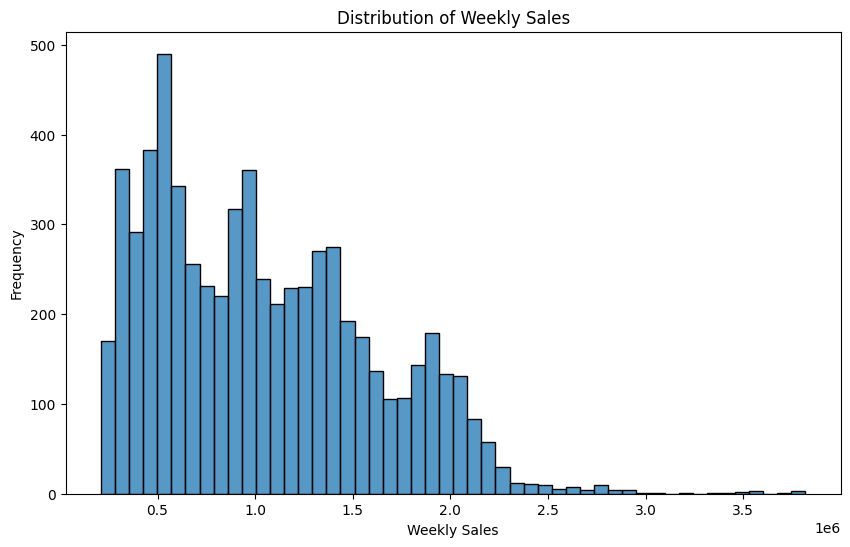

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=50)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()


## Feature Engineering.

In [8]:
# Converting all column names to lower case
df.columns = df.columns.str.lower()
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [9]:
df['date'] = pd.to_datetime(df['date'], format = 'mixed', dayfirst = True)
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6435 entries, 0 to 6434
Series name: date
Non-Null Count  Dtype         
--------------  -----         
6435 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 50.4 KB


In [10]:
df['day'] = df['date'].dt.day 
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df[['day', 'month', 'year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   day     6435 non-null   int32
 1   month   6435 non-null   int32
 2   year    6435 non-null   int32
dtypes: int32(3)
memory usage: 75.5 KB


In [11]:
def to_season(month: int) -> str:
    
    if month in (12, 1, 2):
        return 'Winter'
    elif month in (3, 4, 5):
        return 'Spring'
    elif month in (6, 7, 8):
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(lambda x: to_season(x))    
df['season'].value_counts()

season
Summer    1800
Spring    1755
Fall      1530
Winter    1350
Name: count, dtype: int64

## Sales trends over time.

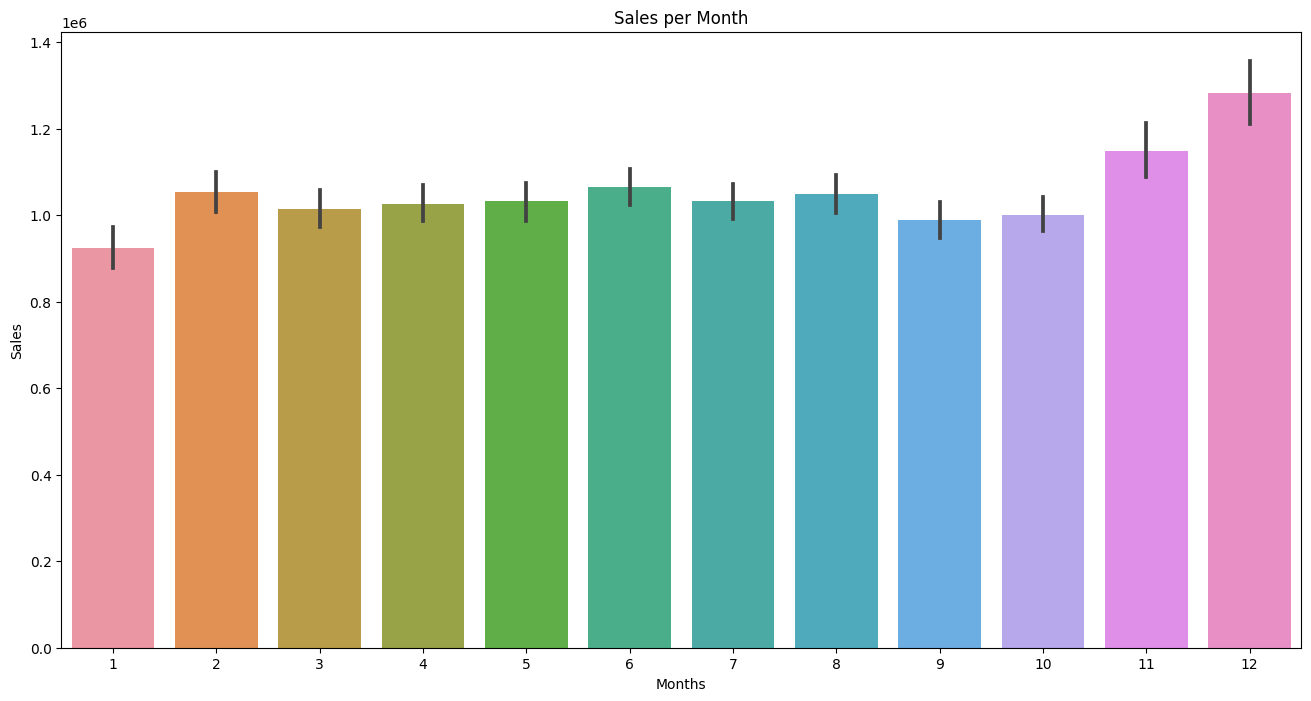

In [12]:
#MONTHLY
plt.figure(figsize=(16,8))
sns.barplot(data = df, x = 'month', y = 'weekly_sales')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Sales per Month')
plt.show()

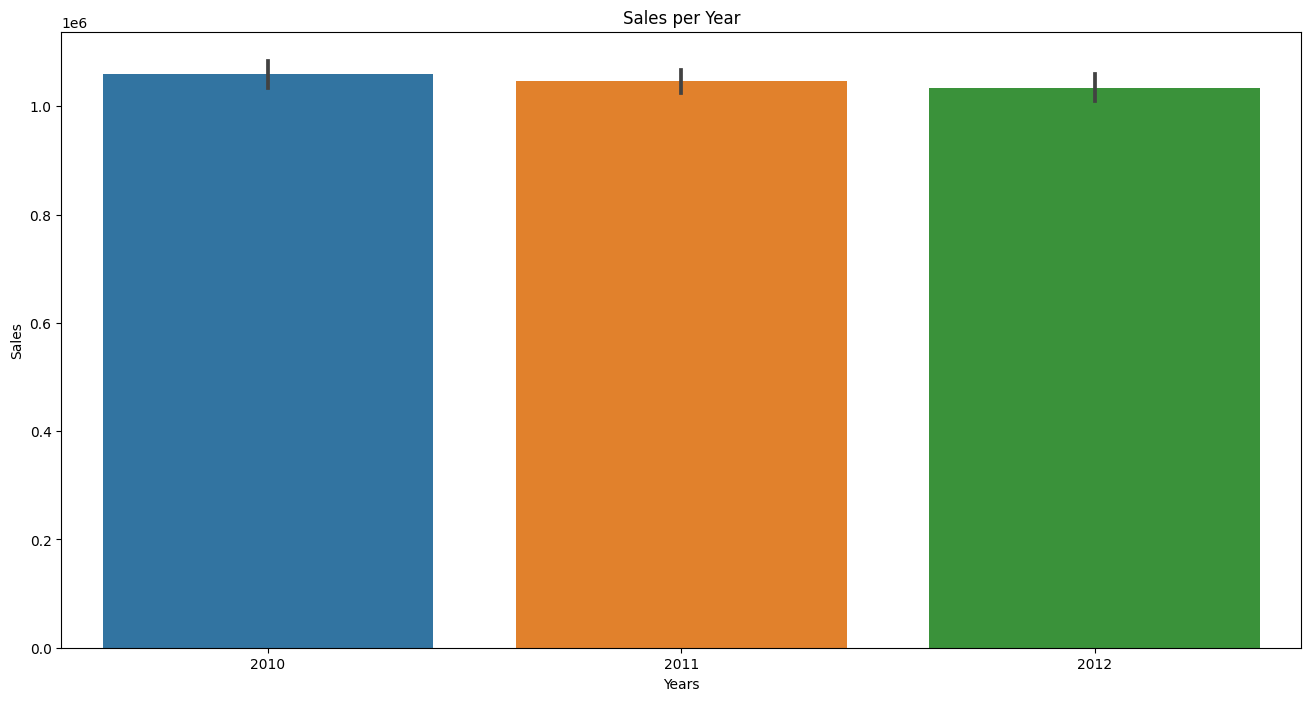

In [13]:
#YEARLY
plt.figure(figsize=(16,8))
sns.barplot(data = df, x = 'year', y = 'weekly_sales')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Sales per Year')
plt.show()

## Variation of sales across stores.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


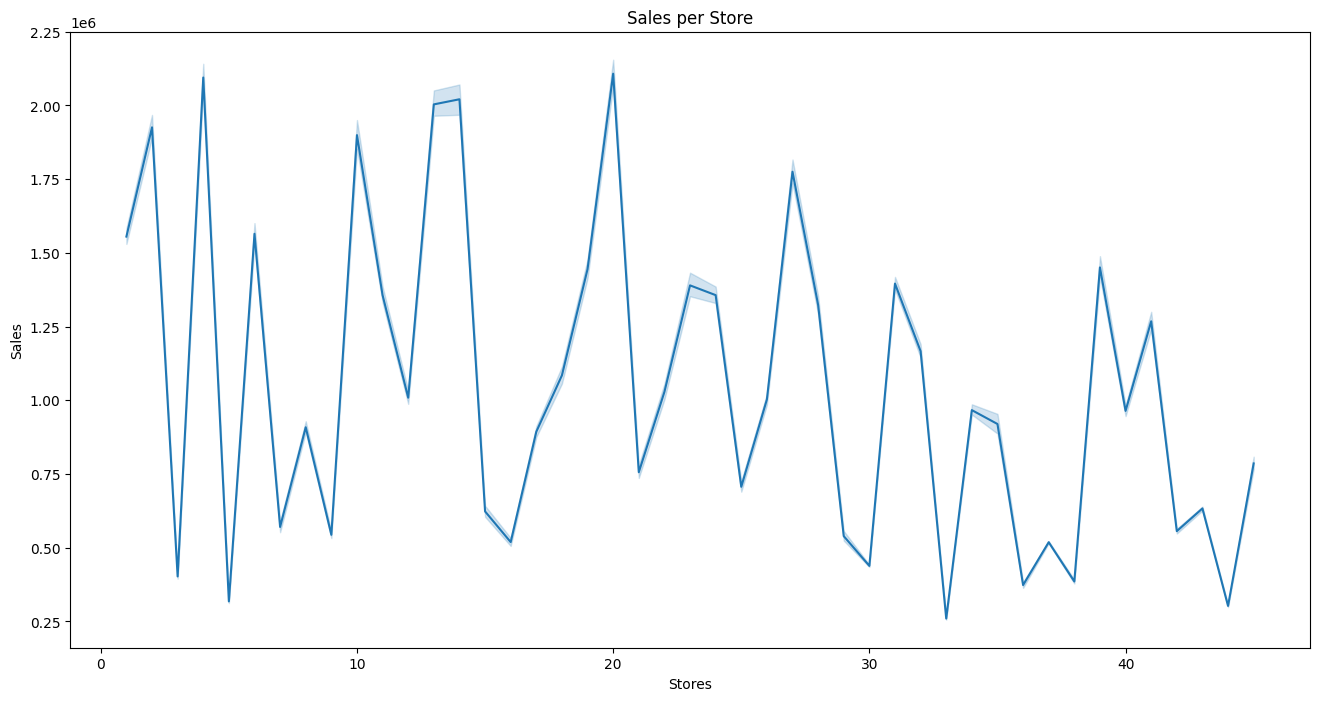

In [14]:
plt.figure(figsize=(16,8))
sns.lineplot(data = df, x = 'store', y = 'weekly_sales')
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.title('Sales per Store')
plt.show()

## Seasonal sales data.

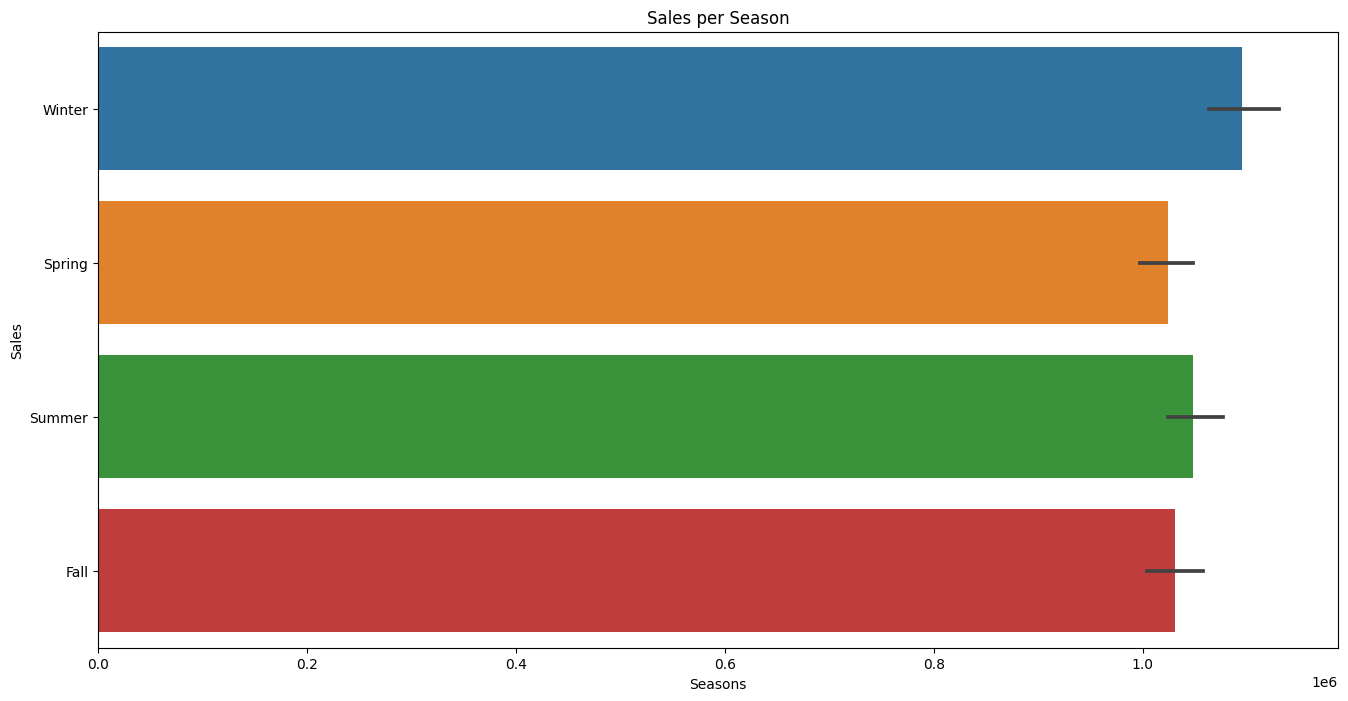

In [15]:
plt.figure(figsize=(16,8))
sns.barplot(data = df, y = 'season', x = 'weekly_sales', orient = 'h')
plt.xlabel('Seasons')
plt.ylabel('Sales')
plt.title('Sales per Season')
plt.show()

## Peak sales periods during the year.

In [16]:
plot_data = df.pivot_table(index = 'year', columns = 'season', values = 'weekly_sales', aggfunc = 'sum')
plot_data

season,Fall,Spring,Summer,Winter
year,,,,
2010,5.972831e+08,6.000431e+08,6.124664e+08,4.790935e+08
2011,6.142714e+08,5.875311e+08,6.082841e+08,6.381134e+08
2012,3.650072e+08,6.091970e+08,6.649705e+08,3.609581e+08


<Axes: xlabel='year', ylabel='Sum of Sales'>

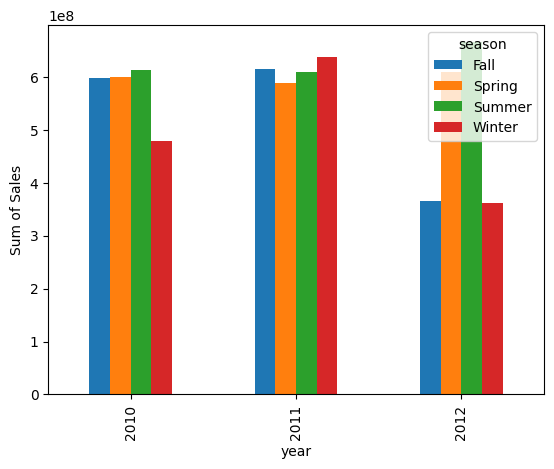

In [17]:
plot_data.plot(kind = 'bar', ylabel = 'Sum of Sales')

In [18]:
plot_data = df.pivot_table(index = 'year', columns = 'month', values = 'weekly_sales', aggfunc = 'sum')
plot_data

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,NaN,1.903330e+08,1.819198e+08,2.314124e+08,1.867109e+08,1.922462e+08,2.325801e+08,1.876401e+08,1.772679e+08,2.171618e+08,2.028534e+08,2.887605e+08
2011,1.637040e+08,1.863313e+08,1.793564e+08,2.265265e+08,1.816482e+08,1.897734e+08,2.299114e+08,1.885993e+08,2.208477e+08,1.832613e+08,2.101624e+08,2.880781e+08
2012,1.688945e+08,1.920636e+08,2.315097e+08,1.889209e+08,1.887665e+08,2.406103e+08,1.875095e+08,2.368508e+08,1.806455e+08,1.843617e+08,NaN,NaN


<Axes: xlabel='year', ylabel='Sum of Sales'>

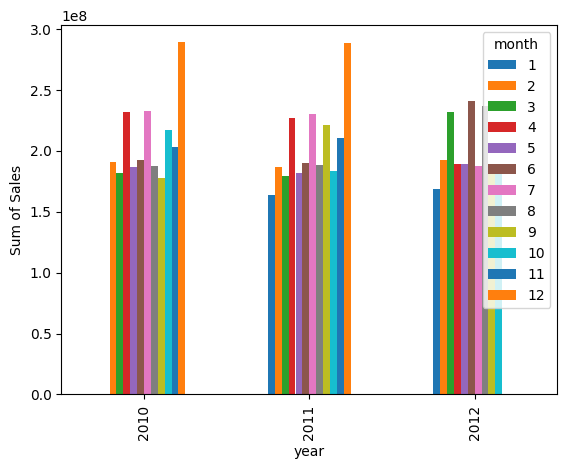

In [19]:
plot_data.plot(kind = 'bar', ylabel = 'Sum of Sales')

## Sales by Holidays

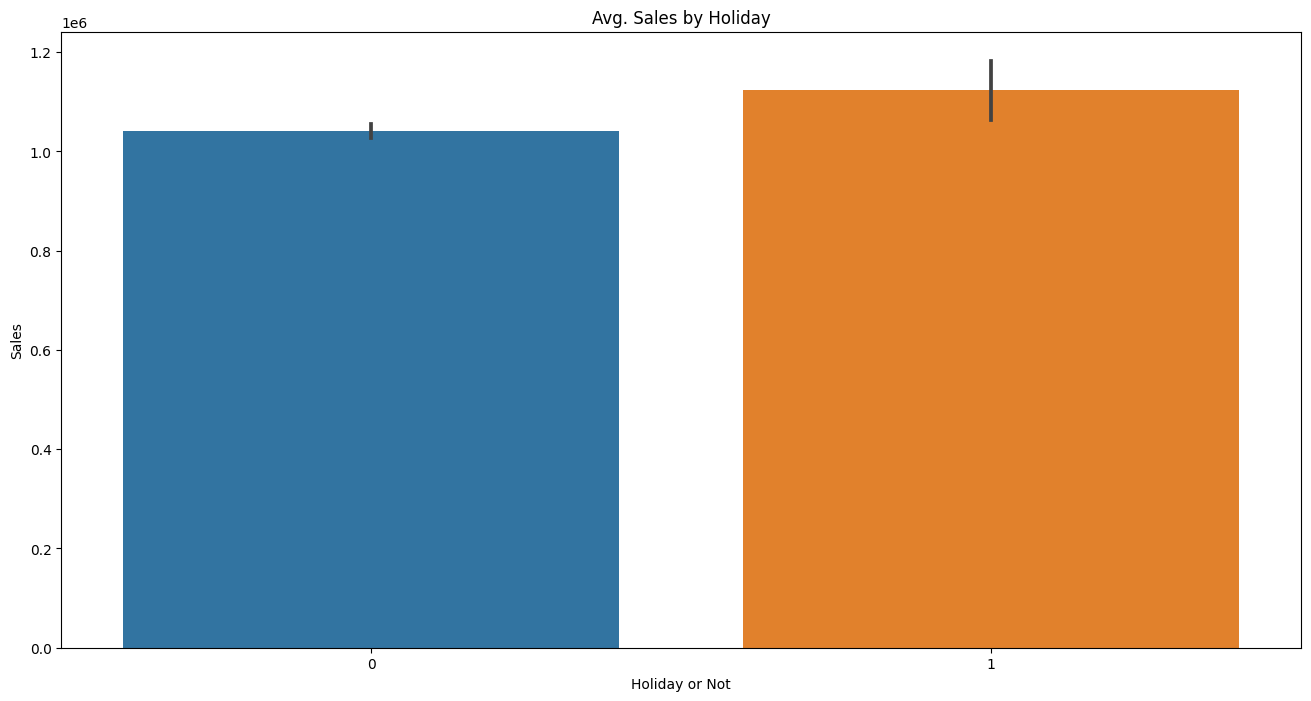

In [20]:
plt.figure(figsize = (16,8))
sns.barplot(data = df, x = 'holiday_flag', y = 'weekly_sales', estimator = 'mean')
plt.xlabel('Holiday or Not')
plt.ylabel('Sales')
plt.title('Avg. Sales by Holiday')
plt.show()

In [21]:
plot_data = df.pivot_table(index = 'year', columns = 'holiday_flag', values = 'weekly_sales', aggfunc = 'mean')
plot_data

holiday_flag,0,1
year,,
2010,1.054880e+06,1.112359e+06
2011,1.037715e+06,1.148530e+06
2012,1.030782e+06,1.092661e+06


<Axes: xlabel='Avg of Sales'>

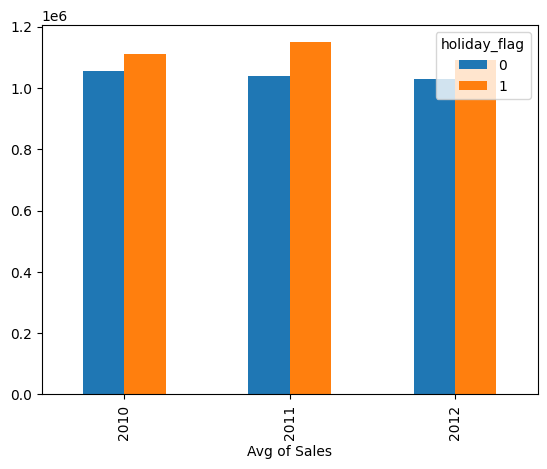

In [22]:
plot_data.plot(kind = 'bar', xlabel = 'Avg of Sales')

In [23]:
plot_data = df.pivot_table(index = 'month', columns = 'holiday_flag', values = 'weekly_sales', aggfunc = 'mean')
plot_data

holiday_flag,0,1
month,,
1,9.238846e+05,NaN
2,1.044557e+06,1.079128e+06
3,1.013309e+06,NaN
4,1.026762e+06,NaN
5,1.031714e+06,NaN
6,1.064325e+06,NaN
7,1.031748e+06,NaN
8,1.048017e+06,NaN
9,9.734078e+05,1.042427e+06


<Axes: xlabel='Avg. of Sales'>

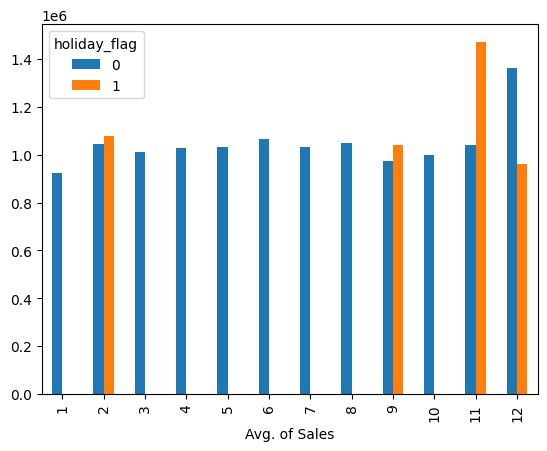

In [24]:
plot_data.plot(kind = 'bar', xlabel = 'Avg. of Sales')

## Correlation analysis.

In [25]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'day', 'month', 'year', 'season'],
      dtype='object')

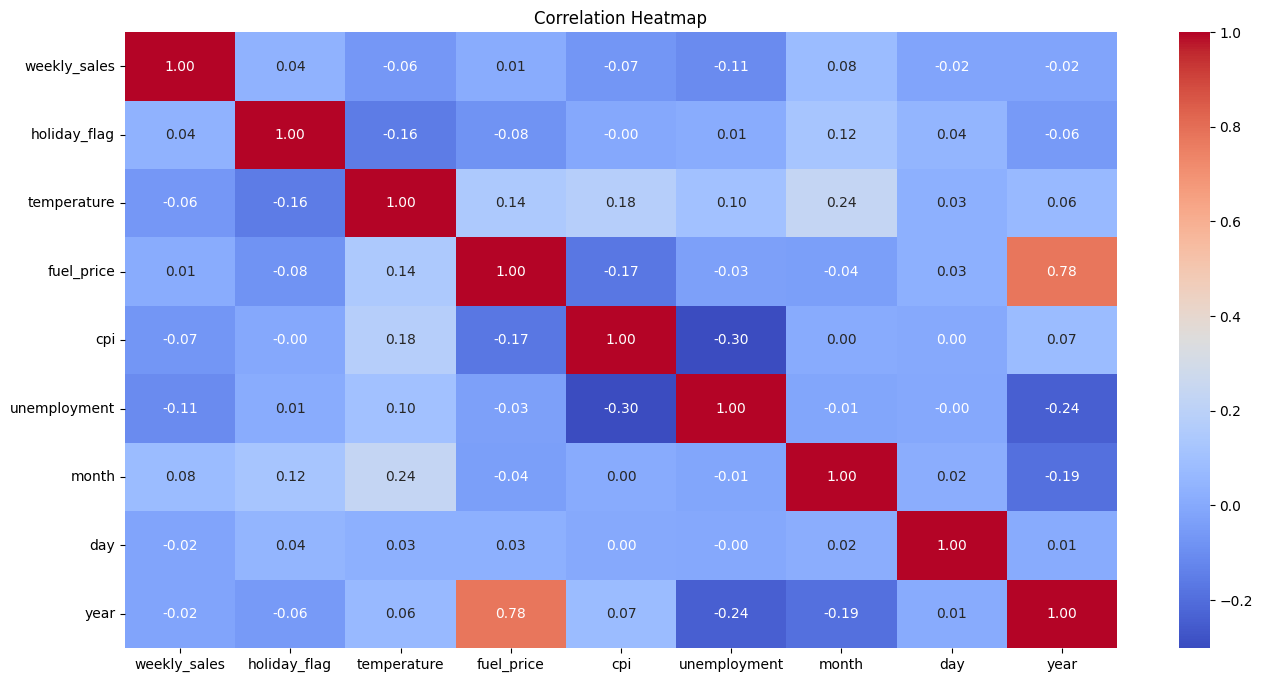

In [26]:
corr_matrix = df[['weekly_sales', 'holiday_flag', 'temperature', 'fuel_price', 'cpi', 'unemployment', 'month', 'day', 'year']].corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [27]:
corr_matrix

,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,month,day,year
weekly_sales,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176,0.076143,-0.017409,-0.018378
holiday_flag,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960,0.122996,0.044526,-0.056783
temperature,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158,0.235862,0.026973,0.064269
fuel_price,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684,-0.042156,0.028073,0.779470
cpi,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020,0.004980,0.002684,0.074796
unemployment,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000,-0.012746,-0.004233,-0.241813
month,0.076143,0.122996,0.235862,-0.042156,0.004980,-0.012746,1.000000,0.015192,-0.194465
day,-0.017409,0.044526,0.026973,0.028073,0.002684,-0.004233,0.015192,1.000000,0.006406
year,-0.018378,-0.056783,0.064269,0.779470,0.074796,-0.241813,-0.194465,0.006406,1.000000


# Part 2: Revenue Prediction
The revenue prediction part will focus on building a predictive model to forecast future sales. The goal is to provide accurate revenue predictions to aid in inventory management, staffing, and promotional planning.

Steps
1. Data Preprocessing:

    Handle missing values and anomalies.
    Normalize or standardize numerical variables.
    Encode categorical variables if necessary.
    
2. Feature Engineering:

      Identify and select the most relevant features for prediction.
      Dimensionality Reduction.

3. Model Selection:

    Choose appropriate regression models for revenue prediction (e.g., Linear Regression, Random Forest, Gradient Boosting, Neural Networks).
    Split the data into training and testing sets to evaluate model performance.

4. Model Training and Evaluation:

    Train the selected models using the training dataset.
    Evaluate model performance using appropriate metrics (e.g., RMSE, MAE, R^2).
    Perform hyperparameter tuning to optimize model performance.

In [28]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Outlier detection and removal using z-scores.

In [29]:
df['z_score'] = np.abs(stats.zscore(df['weekly_sales']))
df.shape

(6435, 13)

In [30]:
thresh = 3
df_clean = df[df['z_score'] < thresh]
df_clean = df_clean.drop('z_score', axis = 1)
df_clean.shape

(6404, 12)

## Standardizing the data(Scaling and One hot encoding).

In [31]:
df_clean = df_clean.drop('date', axis = 1)

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6404 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6404 non-null   int64  
 1   weekly_sales  6404 non-null   float64
 2   holiday_flag  6404 non-null   int64  
 3   temperature   6404 non-null   float64
 4   fuel_price    6404 non-null   float64
 5   cpi           6404 non-null   float64
 6   unemployment  6404 non-null   float64
 7   day           6404 non-null   int32  
 8   month         6404 non-null   int32  
 9   year          6404 non-null   int32  
 10  season        6404 non-null   object 
dtypes: float64(5), int32(3), int64(2), object(1)
memory usage: 525.3+ KB


In [33]:
encoder = OneHotEncoder()
categorical_columns = df_clean.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['season']

In [34]:
data_encoded = encoder.fit_transform(df_clean[categorical_columns]).toarray()
columns=encoder.get_feature_names_out(categorical_columns)
df_encoded = pd.DataFrame(data_encoded, columns = columns)
df_encoded

,season_Fall,season_Spring,season_Summer,season_Winter
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
6399,1.0,0.0,0.0,0.0
6400,1.0,0.0,0.0,0.0
6401,1.0,0.0,0.0,0.0
6402,1.0,0.0,0.0,0.0


In [35]:
df_clean_encoded = pd.concat([df_clean, df_encoded], axis = 1)
df_clean_encoded = df_clean_encoded.drop('season', axis = 1)
df_clean_encoded.dropna(inplace = True)

In [36]:
scaler = StandardScaler()
columns = df_clean_encoded.columns
data_scaled = scaler.fit_transform(df_clean_encoded)
df_scaled = pd.DataFrame(data_scaled, columns = columns)
df_scaled

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year,season_Fall,season_Spring,season_Summer,season_Winter
0,-1.697261,1.106336,-0.272326,-0.998634,-1.709338,1.003215,0.057012,-1.215034,-1.368621,-1.209504,-0.559892,-0.613562,-0.625202,1.958407
1,-1.697261,1.103168,3.672069,-1.204641,-1.761577,1.006913,0.057012,-0.415968,-1.368621,-1.209504,-0.559892,-0.613562,-0.625202,1.958407
2,-1.697261,1.048368,-0.272326,-1.127659,-1.835582,1.008104,0.057012,0.383099,-1.368621,-1.209504,-0.559892,-0.613562,-0.625202,1.958407
3,-1.697261,0.678808,-0.272326,-0.764437,-1.733281,1.008878,0.057012,1.182166,-1.368621,-1.209504,-0.559892,-0.613562,-0.625202,1.958407
4,-1.697261,0.943915,-0.272326,-0.771484,-1.593977,1.009651,0.057012,-1.215034,-1.058971,-1.209504,-0.559892,1.629828,-0.625202,-0.510619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,1.705707,-0.521136,-0.272326,-0.968817,0.830778,0.468325,0.225934,0.953861,-1.368621,1.303346,1.786059,-0.613562,-0.625202,-0.510619
6369,1.705707,-0.466800,-0.272326,-1.039835,0.998378,0.472497,0.225934,-1.557492,-1.058971,1.303346,1.786059,-0.613562,-0.625202,-0.510619
6370,1.705707,-0.477448,-0.272326,-0.824612,1.068030,0.476669,0.225934,-0.758425,-1.058971,1.303346,1.786059,-0.613562,-0.625202,-0.510619
6371,1.705707,-0.456669,-0.272326,-0.551382,1.098502,0.479863,0.225934,0.040642,-1.058971,1.303346,1.786059,-0.613562,-0.625202,-0.510619


## Dimensionality Reduction.

<Axes: >

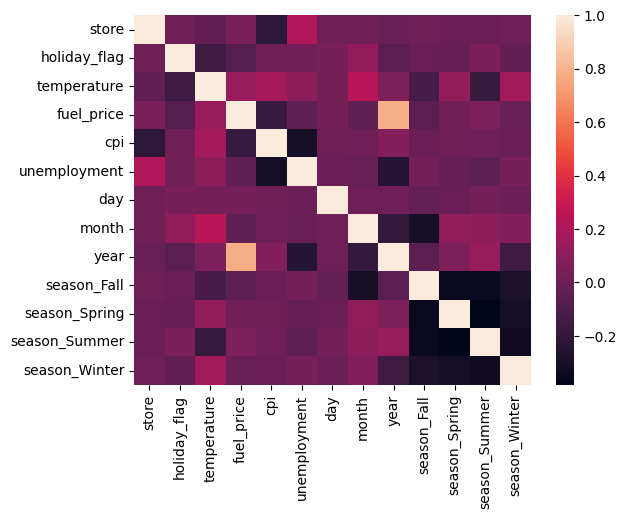

In [37]:
sns.heatmap(data = df_scaled.drop('weekly_sales', axis = 1).corr())

In [38]:
from sklearn.decomposition import PCA

df_pca = df_scaled.drop('weekly_sales', axis = 1)

1.0000000000000002

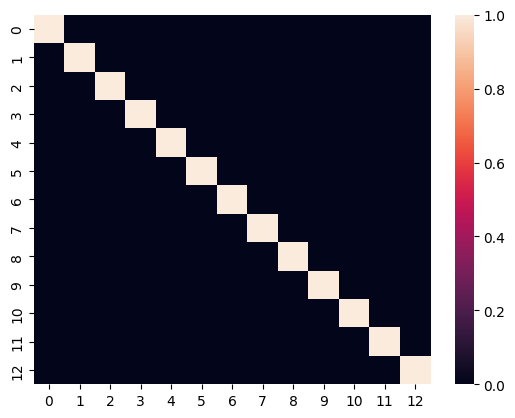

In [39]:
pca = PCA()

reduced_data = pca.fit_transform(df_pca)

df_reduced=pd.DataFrame(reduced_data)
sns.heatmap(data = df_reduced.corr())

explained_variance = pca.explained_variance_ratio_
explained_variance.sum()

## Splitting data.

In [40]:
X = df_reduced
Y = df_scaled['weekly_sales']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 69)

## Model Training.

In [41]:
model = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error', random_state = 69)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=69)

In [42]:
y_pred = model.predict(x_test)

## Evaluation of the model.

In [43]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [44]:
print(f'rmse: {rmse}, r2: {r2}')

rmse: 0.603598882372728, r2: 0.6360979991669342
